In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

red = pd.read_csv('../data/winequality-red.csv', sep=';')
# white = pd.read_csv('../data/winequality-white.csv', sep=';')

In [5]:
red.isnull().values.any()

False

In [6]:
from sklearn import cross_validation

features = red.drop(['quality'], 1)
labels   = red['quality']
X_train, X_test, y_train, y_test = cross_validation.train_test_split(features, labels, test_size=0.4, random_state=0)

In [7]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.46562500000000001

In [8]:
from sklearn import linear_model

clf2 = linear_model.LinearRegression()
clf2.fit(X_train, y_train)
clf2.score(X_test, y_test)

0.28116187127936476

In [9]:
clf3 = linear_model.BayesianRidge()
clf3.fit(X_train, y_train)
clf3.score(X_test, y_test)

0.28493299345128575

In [10]:
clf4 = linear_model.LogisticRegression()
clf4.fit(X_train, y_train)
clf4.score(X_test, y_test)

0.6171875

In [11]:
clf41 = linear_model.LogisticRegression(C=9.0, solver='lbfgs')
clf41.fit(X_train, y_train)
clf41.score(X_test, y_test)

0.62656250000000002

In [12]:
clf5 = linear_model.ARDRegression()
clf5.fit(X_train, y_train)
clf5.score(X_train, y_train)

0.37703026802957207

In [13]:
from sklearn import svm

lin_clf = svm.LinearSVC()
lin_clf.fit(X_train, y_train)
lin_clf.score(X_train, y_train)

0.44421272158498437

In [14]:
from sklearn import ensemble

gb = ensemble.GradientBoostingClassifier(random_state=1)
gb.fit(X_train, y_train)
gb.score(X_test, y_test)

0.63906249999999998

In [15]:
rf = ensemble.RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.640625

In [27]:
np.sort(pd.unique(red['quality'].ravel()))

array([3, 4, 5, 6, 7, 8], dtype=int64)

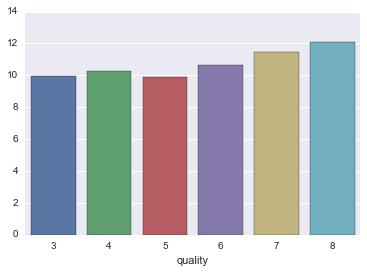

In [44]:
# find average alchohol content by quality
quality_alcohol = red['alcohol'].groupby(red['quality']).mean()
sns.barplot(x=quality_alcohol.index, y=quality_alcohol.values)

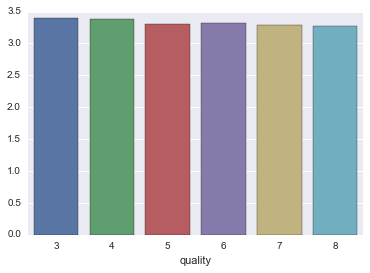

In [46]:
# plot the average pH by quality
ph = red['pH'].groupby(red['quality']).mean()
sns.barplot(x=ph.index, y=ph.values)

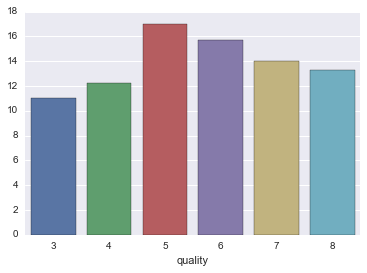

In [47]:
# plot the free sulfer dioxide by quality
sd = red['free sulfur dioxide'].groupby(red['quality']).mean()
sns.barplot(x=sd.index, y=sd.values)

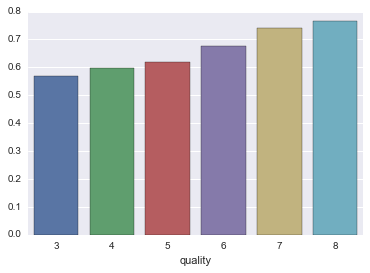

In [48]:
# plot the sulphates by quality
sul = red['sulphates'].groupby(red['quality']).mean()
sns.barplot(x=sul.index, y=sul.values)

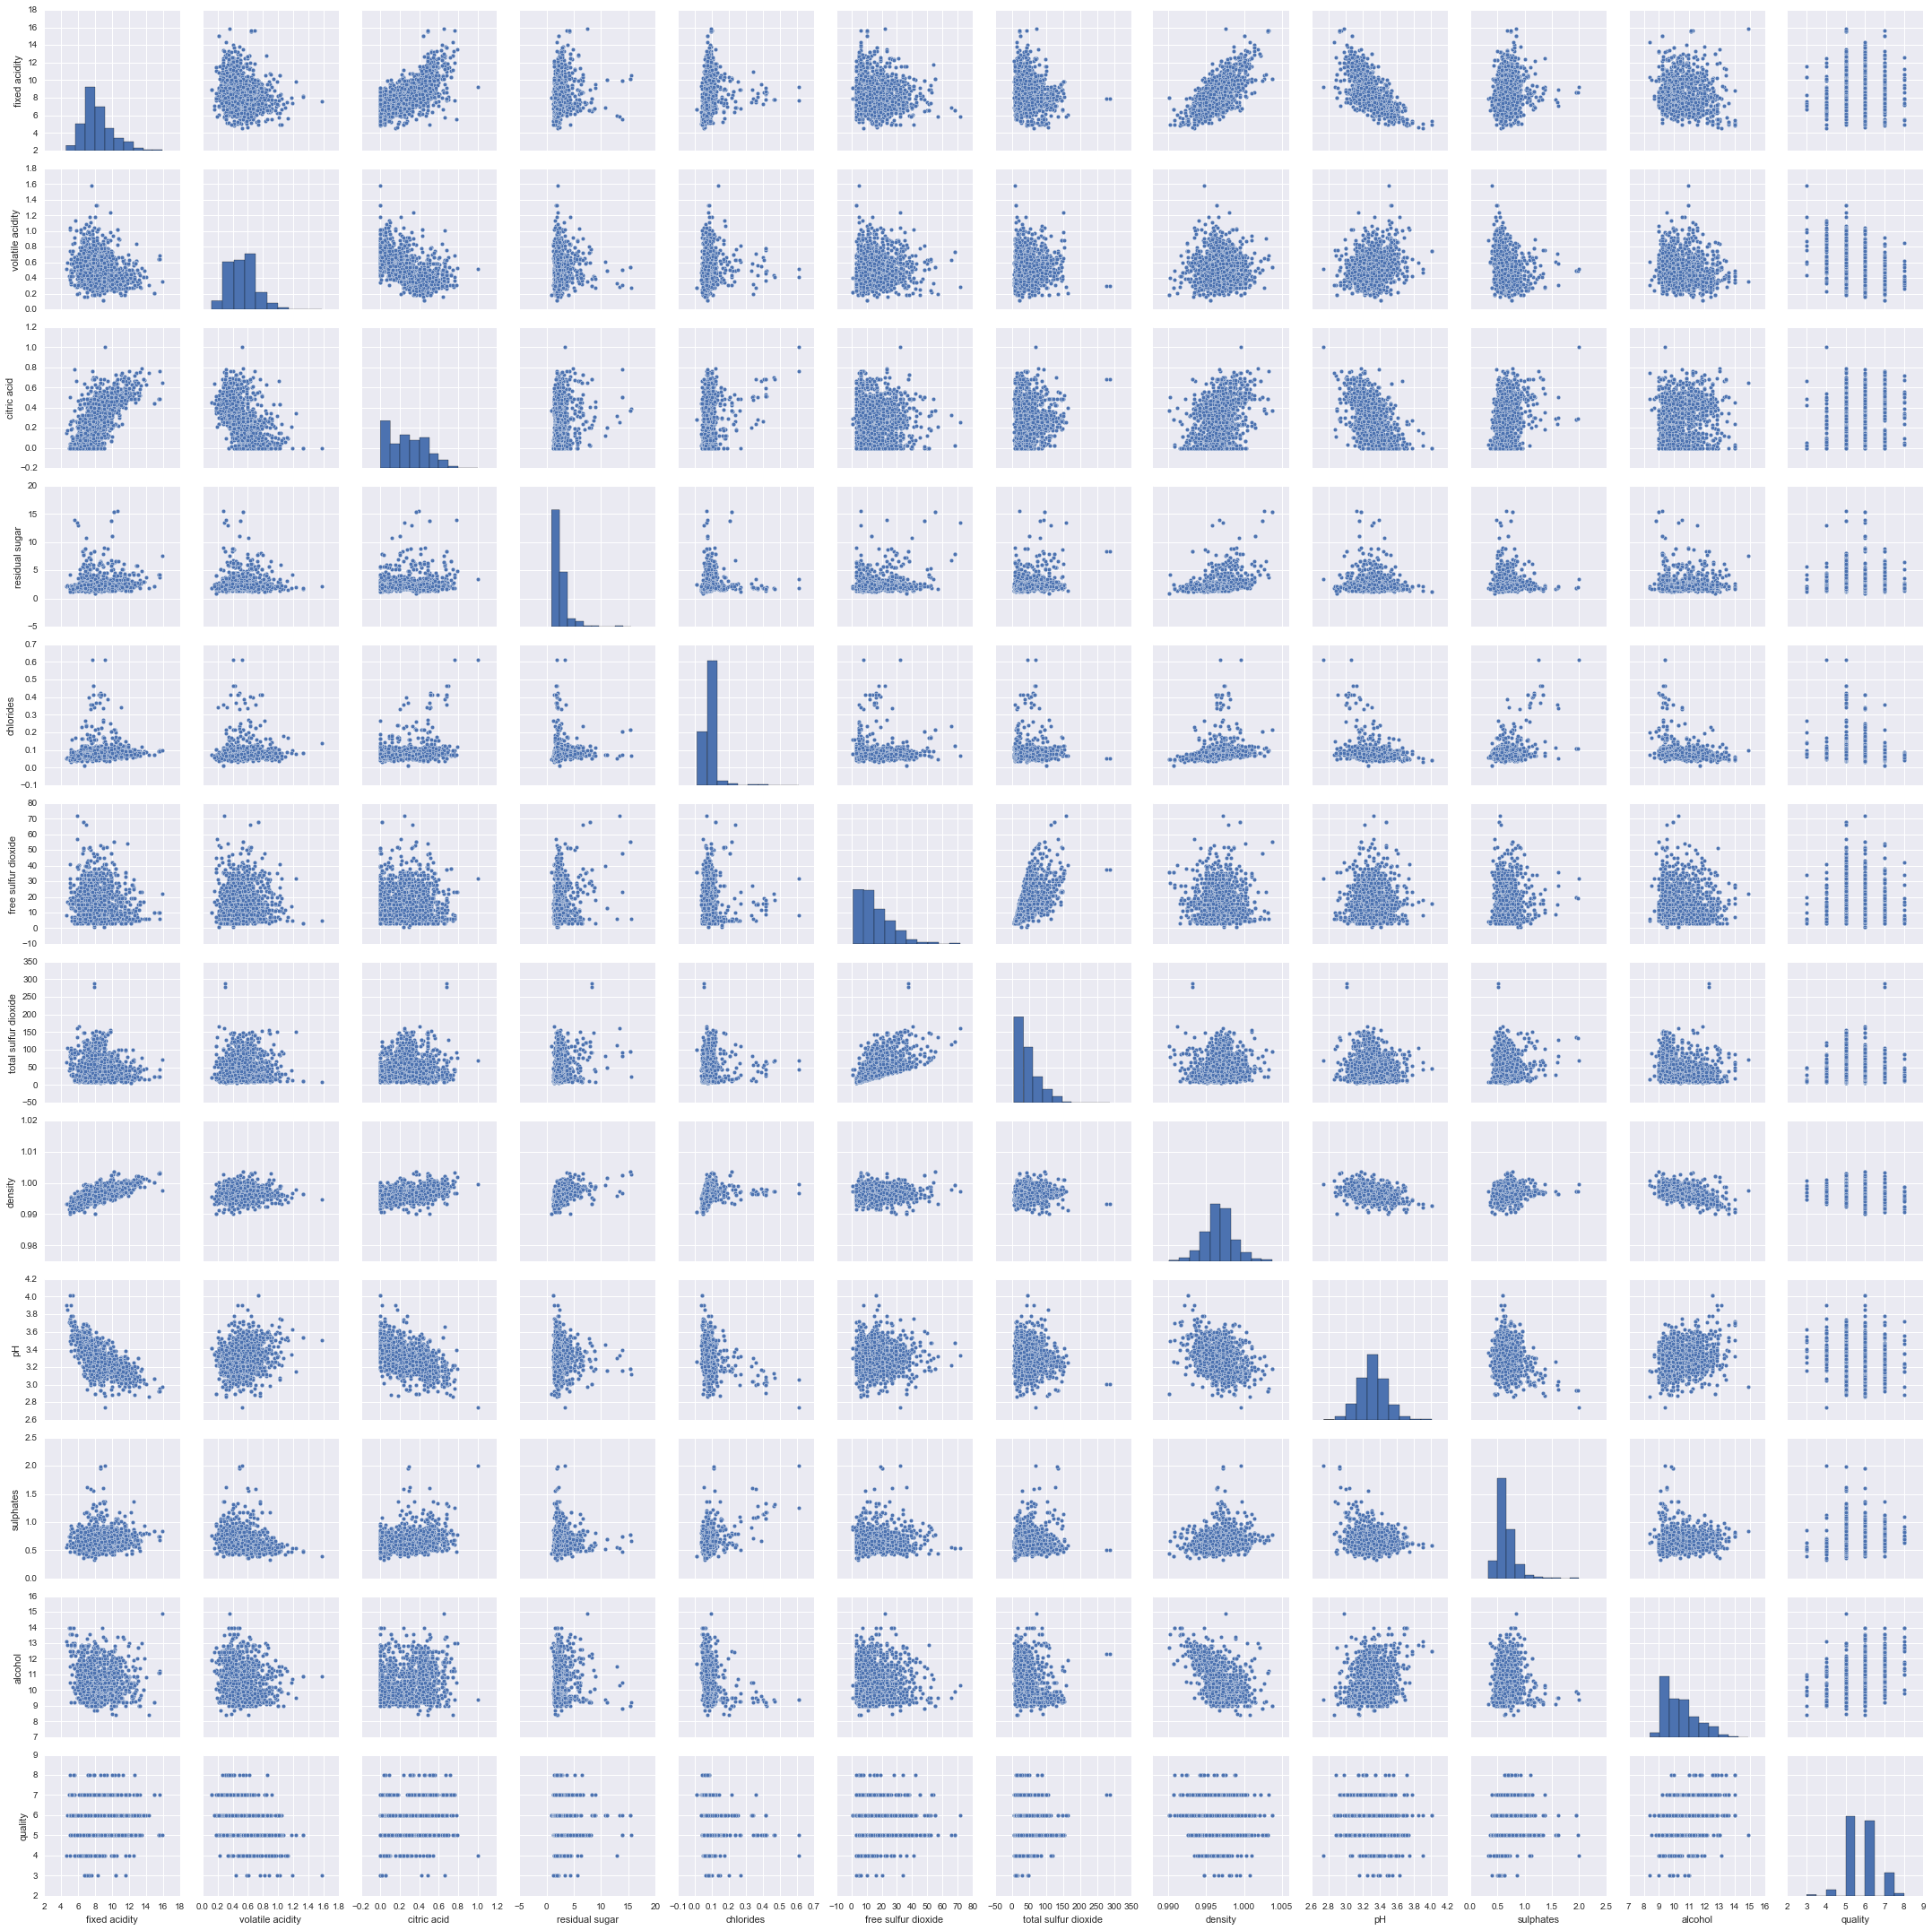

In [49]:
sns.pairplot(red)

In [50]:
from sklearn import neural_network

nn1 = neural_network.BernoulliRBM()
nn1.(X_train)

In [51]:
# Adaboost
ada = ensemble.AdaBoostClassifier()
ada.fit(X_train, y_train)
ada.score(X_test, y_test)

0.58906250000000004

In [60]:
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

lf1 = LogisticRegression(random_state=1)
lf2 = RandomForestClassifier(random_state=1)
lf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', lf1), ('rf', lf2), ('gnb', lf3)], voting='hard')
for clf, label in zip([lf1, lf2, lf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_validation.cross_val_score(clf, features, labels, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.57 (+/- 0.03) [Logistic Regression]
Accuracy: 0.54 (+/- 0.03) [Random Forest]
Accuracy: 0.53 (+/- 0.05) [naive Bayes]
Accuracy: 0.57 (+/- 0.03) [Ensemble]
